# Python Frameworks (480Hz, nicht-fullscreen(most), pixel [5,5], 50 iterations)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
PATH = "../../data/python_0512_480hz_55"

In [3]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['pygame_default_False_bitblt_ac54fb83-cfa3-4f5c-857e-5ebcc7b00a5b.csv',
 'pygame_default_False_getdbits_48a9dd85-9ef9-4cd9-834f-92f0c8e351ab.csv',
 'pygame_default_False_getpixel_56214f51-b076-4683-8b4a-ed033c763edb.csv',
 'pygame_default_False_windup_python_f65f0a0f-3a39-4095-927b-0936a3ee0705.csv',
 'pygame_default_True_bitblt_1f6466b6-41ce-4499-b944-fb122796e2e1.csv',
 'pygame_default_True_getdbits_5fda8acc-38a2-4c98-a21d-dd11d4dc9f85.csv',
 'pygame_default_True_getpixel_f6520638-a0a4-40b0-97a4-fdf011a76c9f.csv',
 'pygame_default_True_windup_python_e69e2e0b-ced9-4c6e-8c99-b465a61b47bf.csv',
 'pygame_rects_False_bitblt_6aeb352f-2758-4456-9eda-28479e952399.csv',
 'pygame_rects_False_getdbits_04f02c97-0347-4e9f-b145-94351e16e477.csv',
 'pygame_rects_False_getpixel_ca892506-1839-48a0-aec4-27c3c17eb1bc.csv',
 'pygame_rects_False_windup_python_2ba172e9-d52c-435a-8c57-3bb525559691.csv',
 'pygame_rects_True_bitblt_b8e2f7e7-e42c-43d8-9d9a-35f5594f48d7.csv',
 'pygame_rects_True_getdbits_35ed

In [4]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data_raw = pd.concat(dataframes)

In [5]:
# clean because windup not working with opengl based
# df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))] 
# data_clean = data_raw.loc[~((data_raw['fw_running'] == True) & (data_raw['fw'] == -1) & (data_raw['diff'] < 0))]
# data = data_clean

In [6]:
data = data_raw

## End-to-end latencies with and without running framework tester
### Complexity: Default

about 5ms difference  
with running fw testerm it's faster

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\3130854144.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


(0.0, 35000.0)

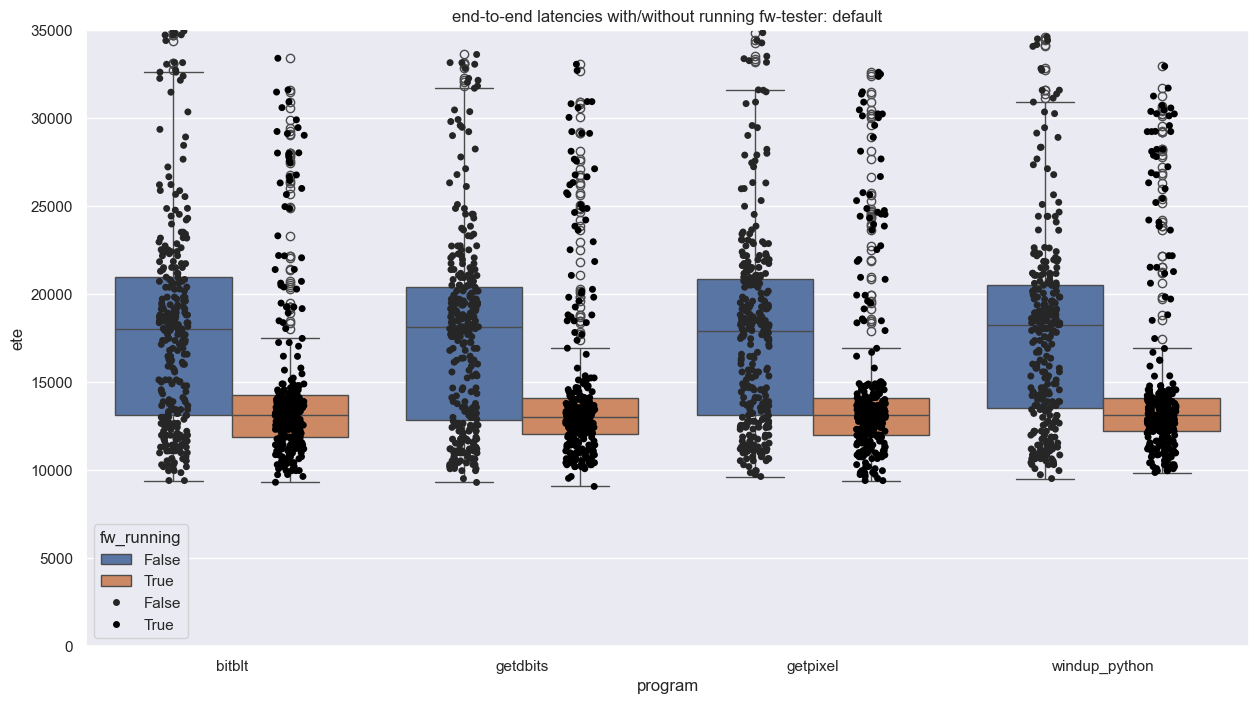

In [7]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester: default')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 35000)
# for i in range(0, 20):
#     plt.axhline(i*2.1*1000, color='red')

### Complexity: Rects

Again, about 5ms difference  
Faster with running fw tester

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\2151654977.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


(0.0, 150000.0)

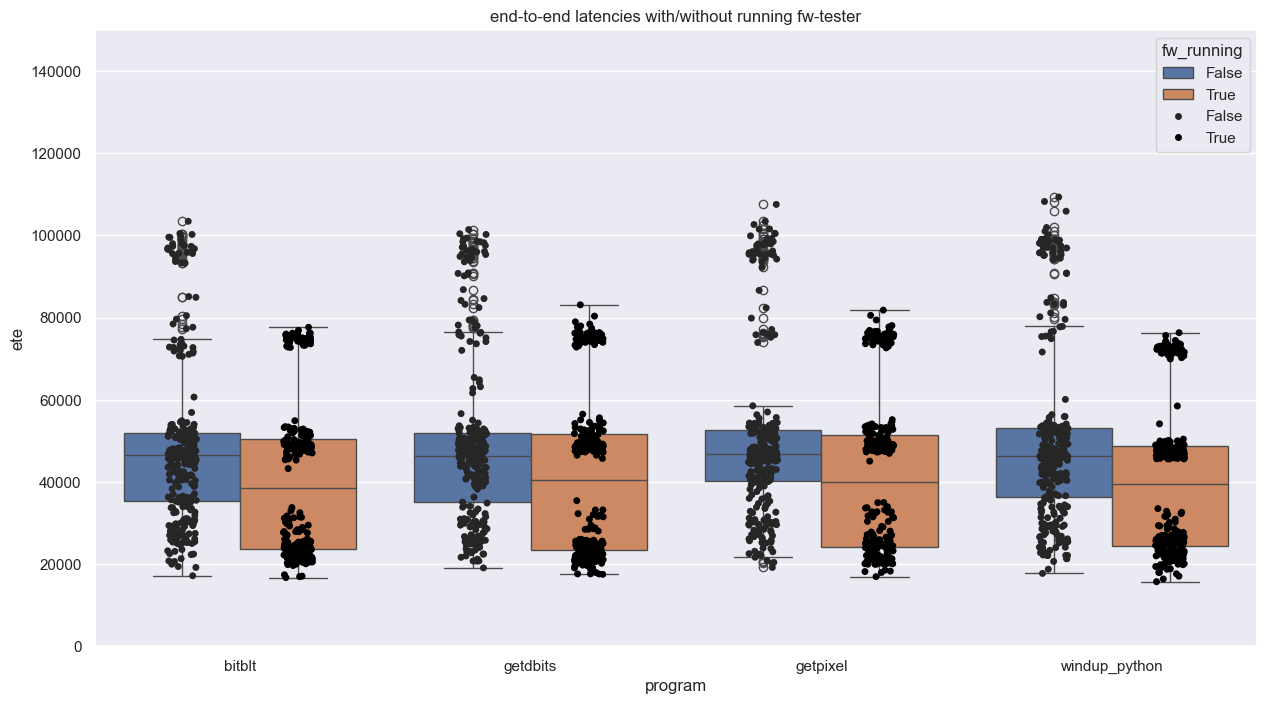

In [8]:
sns.boxplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 150000)
# for i in range(0, 20):
#     plt.axhline(i*2.1*1000, color='red')

## Framework latency by framework
### Complexity: Default

windup unrealistisch große werte(?)

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\785719403.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='fw'>

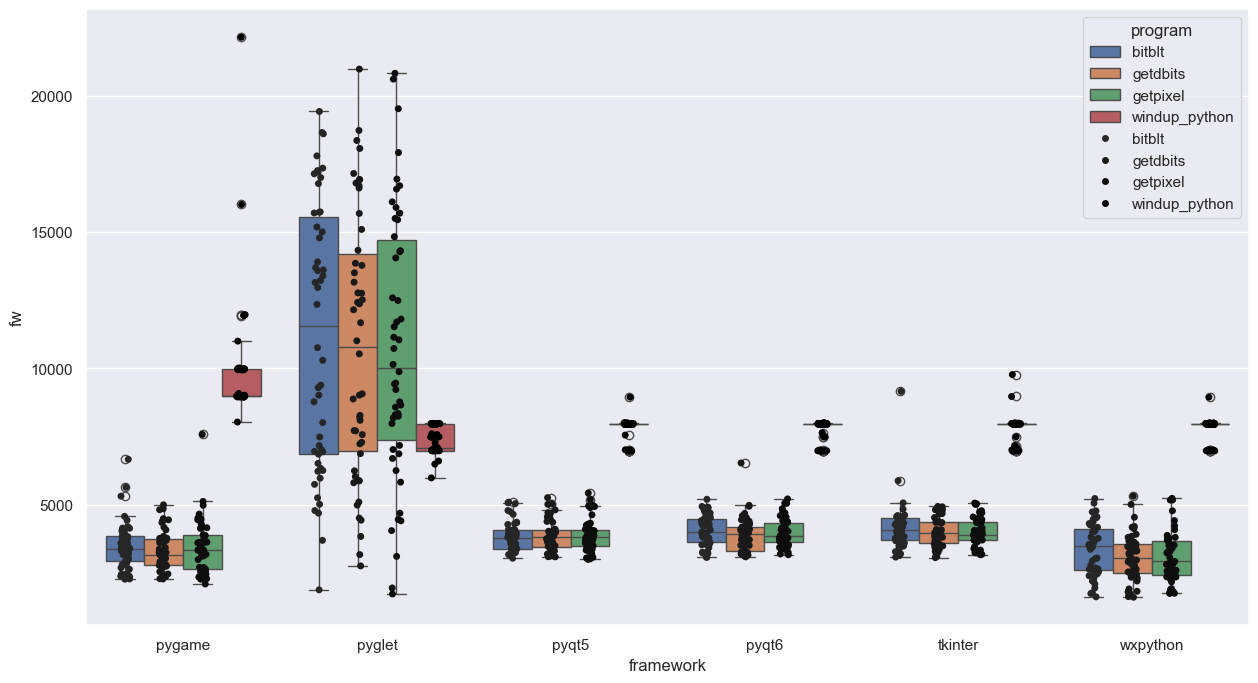

In [9]:
sns.boxplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
# ax = plt.gca()
# ax.set_ylim(-1000, 15000)

### Complexity: Rects
was soll das denn???

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\2191301594.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='fw'>

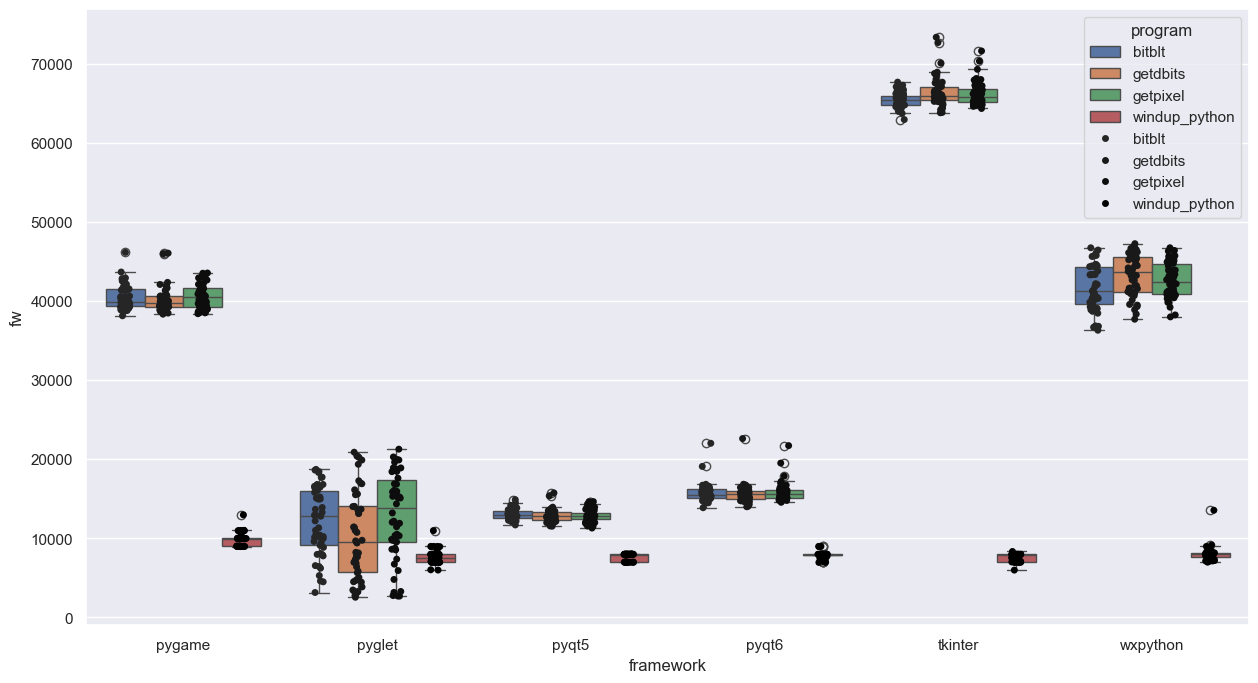

In [10]:
sns.boxplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
# ax = plt.gca()
# ax.set_ylim(-1000, 50000)

### Framework latency by complexity

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\252265620.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')


<Axes: xlabel='complexity', ylabel='fw'>

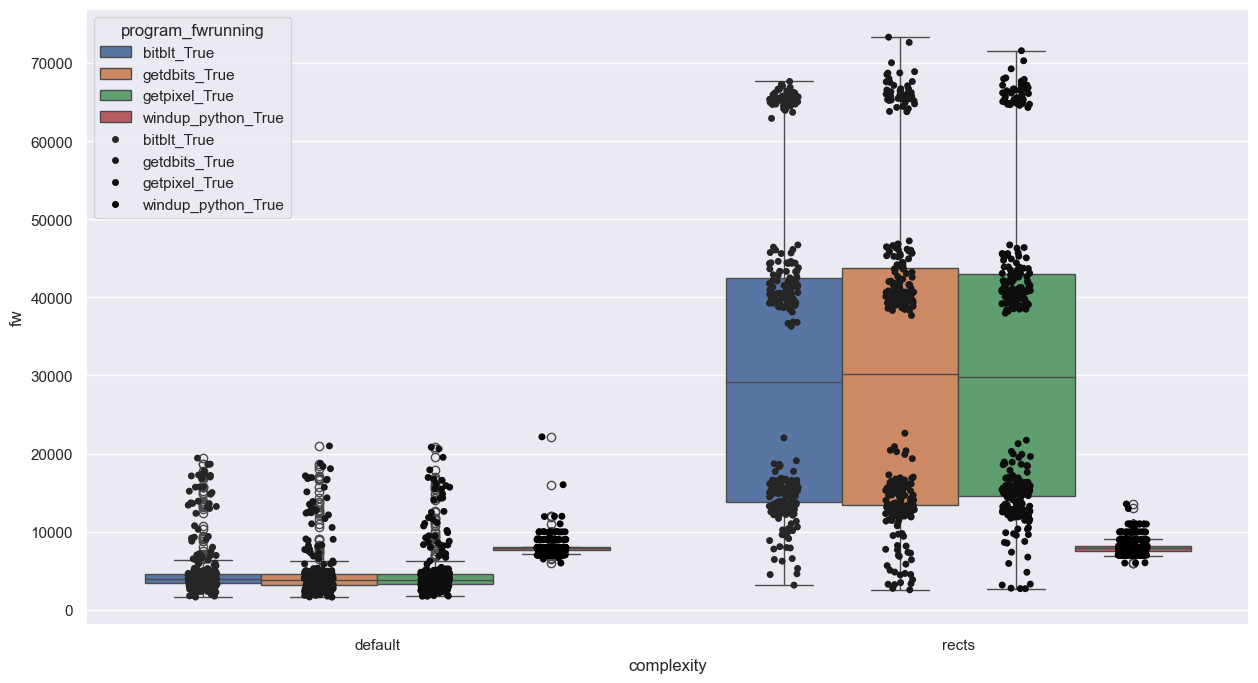

In [11]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')

### Framework latency by framework

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\2248004208.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#000000'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))


<Axes: xlabel='framework', ylabel='fw'>

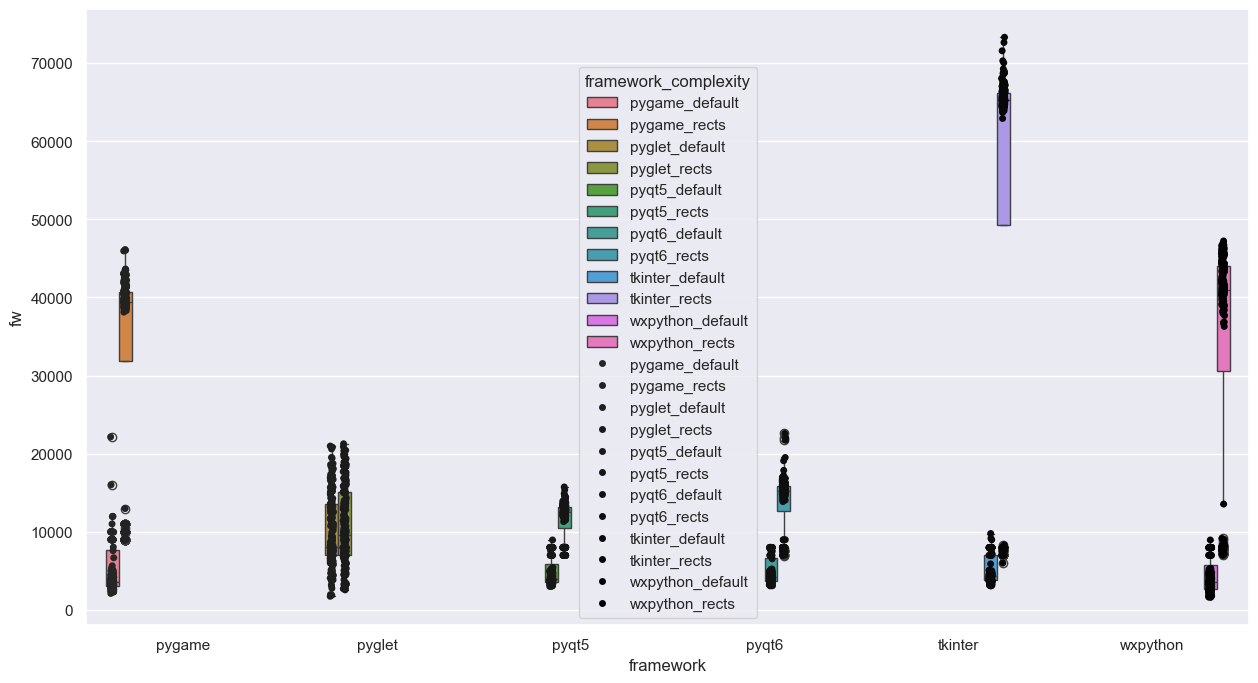

In [12]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\3460521000.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')


<Axes: xlabel='framework_complexity', ylabel='fw'>

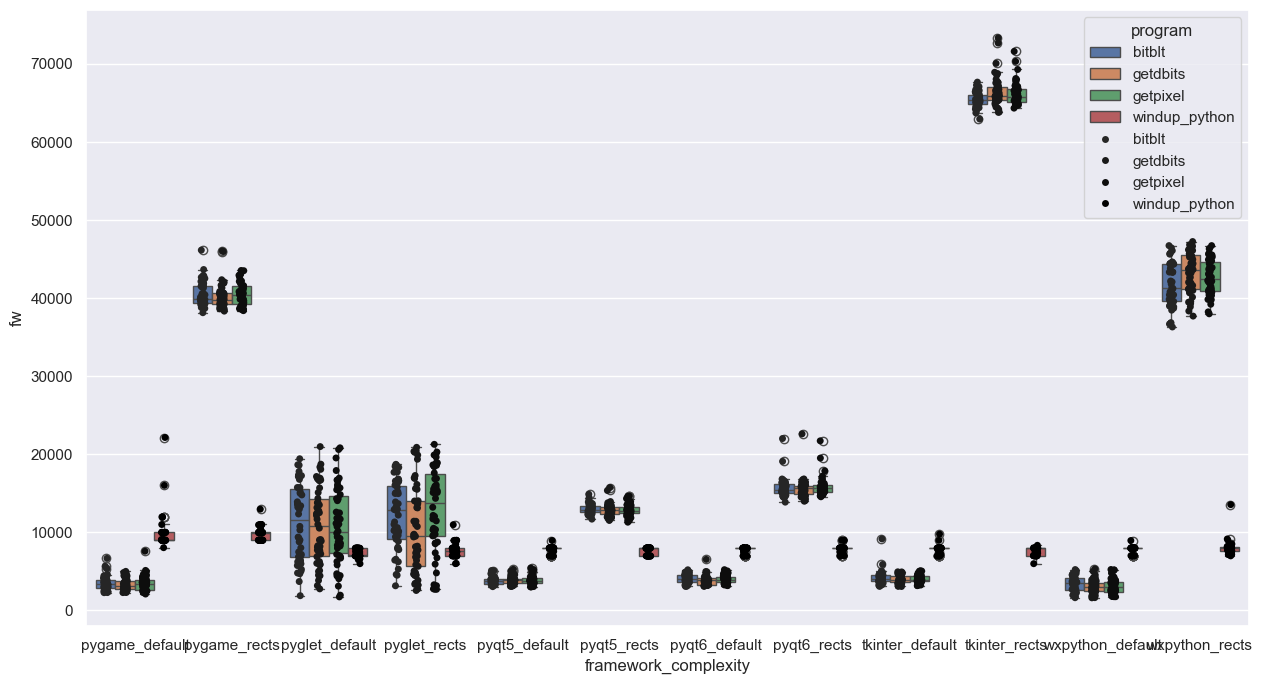

In [13]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework_complexity', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')

## Difference (ete and fw) by program
### Complexity: Rects

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\869703034.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='diff'>

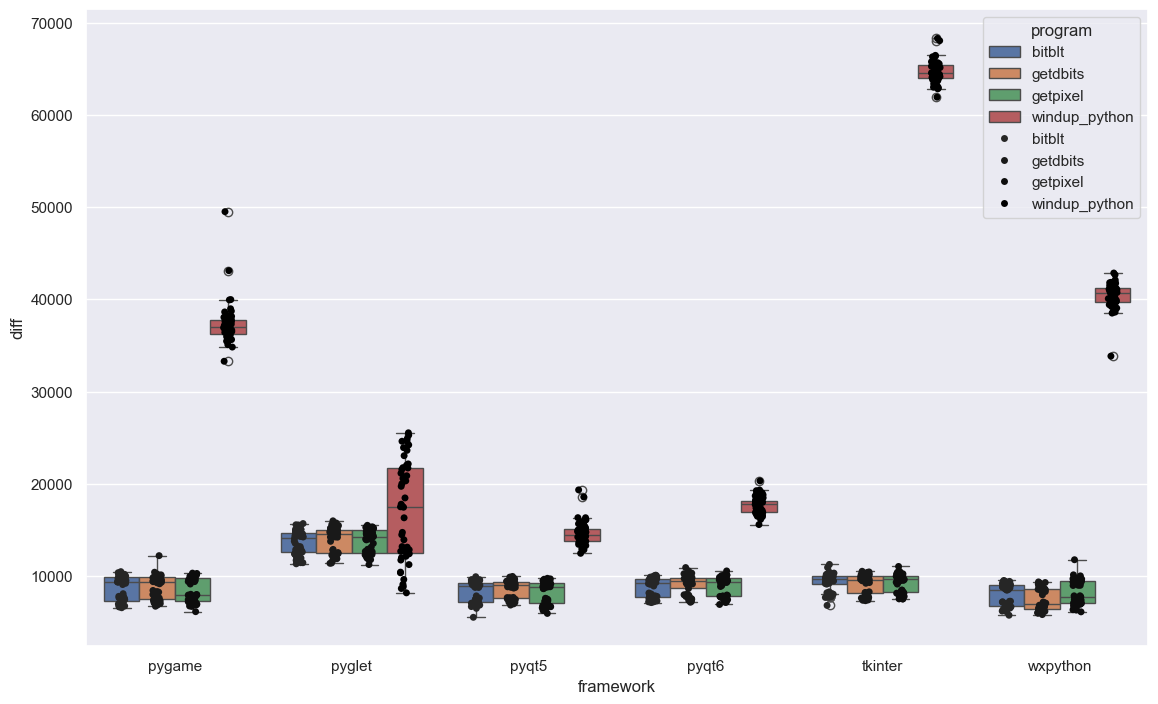

In [17]:
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')
# ax = plt.gca()
# ax.set_ylim(7000, 12000)


### Complexity: Default

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_19916\3242510189.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='diff'>

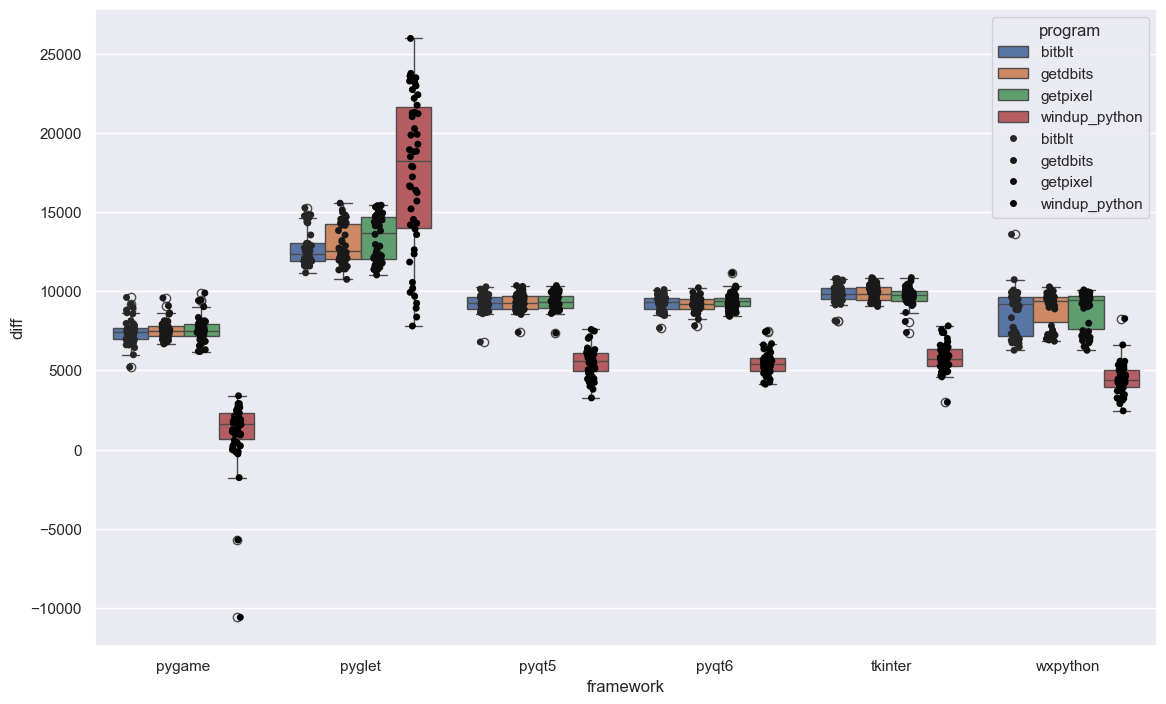

In [18]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')
# ax = plt.gca()
# ax.set_ylim(6000, 12000)

<Axes: xlabel='framework', ylabel='diff'>

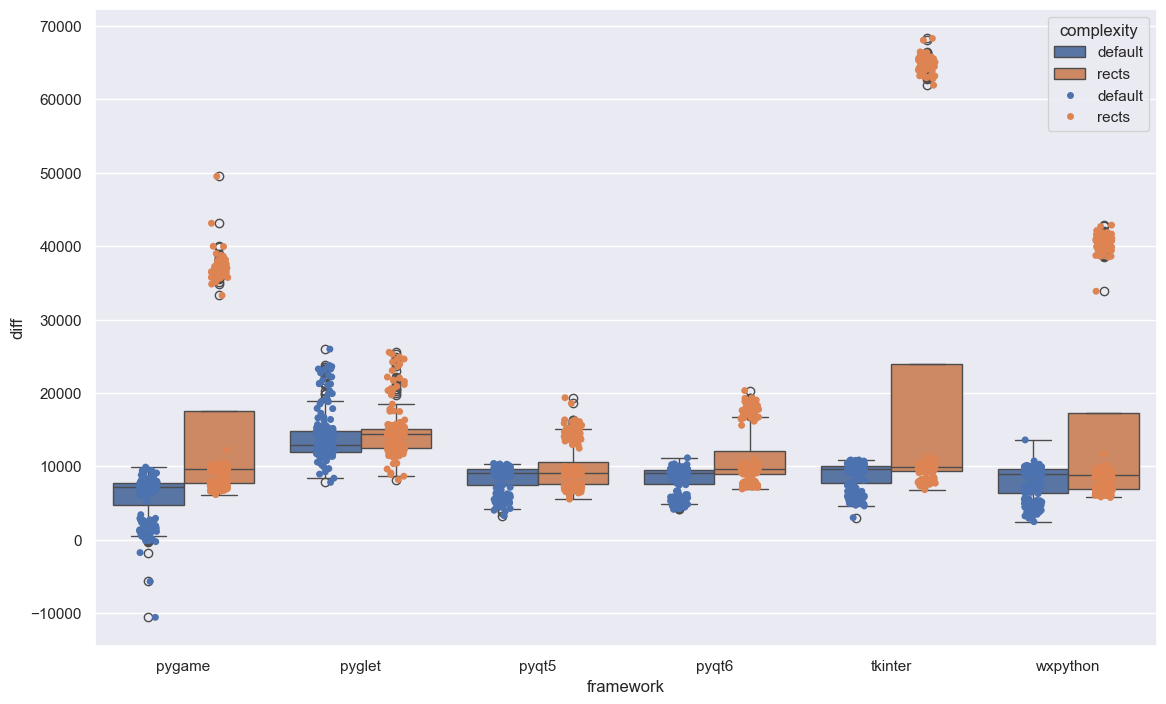

In [16]:
sns.boxplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True)
# ax = plt.gca()
# ax.set_ylim(-10000, 40000)
# for i in range(0, 20):
#     plt.axhline(i*2.1*1000, color='red')